In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import cmath

In [2]:
def lambda_plus_4(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*(-2*special.dawsn(z))+np.pi*1j*z*(b_1+b_3*z**2+b_5*z**4)*np.exp(-z**2)/np.sqrt(np.pi)

def lambda_minus_4(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*(-2*special.dawsn(z))-np.pi*1j*z*(b_1+b_3*z**2+b_5*z**4)*np.exp(-z**2)/np.sqrt(np.pi)


def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)

I = np.vectorize(Cauchy)


def lambda_z(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*I(z)


def Cauchy2(z):
    s=integrate.quad(lambda x: (x**2+z.real**2-z.imag**2-2*x*z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
J=np.vectorize(Cauchy2)


def dlambda_dz(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return 2*a_2*z+4*a_4*z**3+(b_1+3*b_3*z**2+5*b_5*z**4)*I(z)+z*(b_1+b_3*z**2+b_5*z**4)*J(z)

lambda_plus_4= np.vectorize(lambda_plus_4)
lambda_minus_4= np.vectorize(lambda_minus_4)
lambda_z=np.vectorize(lambda_z)


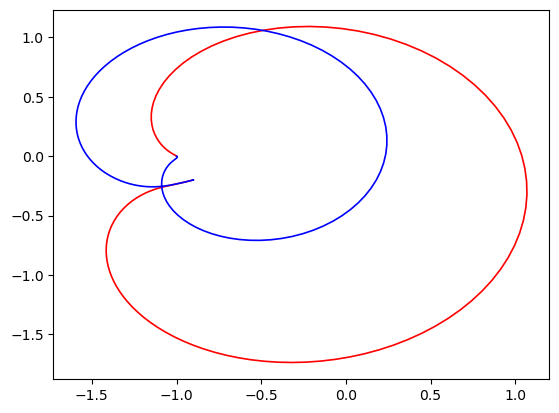

In [3]:
z=np.linspace(-500, 0, 20000)
y=lambda_plus_4(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z)

plt.plot(y.real,y.imag,color='red',lw=1.2)

z=np.linspace(0, 500, 20000)
y=lambda_plus_4(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z)

plt.plot(y.real,y.imag,color='b',lw=1.2)

plt.show()


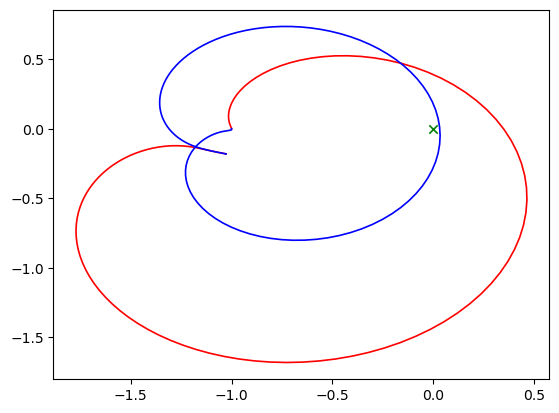

In [4]:
aj=1+0.7j
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-500, 0, 20000)
y=lambda_plus_4(-1, (-0.1-0.1j)/aj, (-3+0.3j)/aj, (2+0.2j)/aj,  z)

plt.plot(y.real,y.imag,color='red',lw=1.2)

z=np.linspace(0, 500, 20000)
y=lambda_plus_4(-1, (-0.1-0.1j)/aj, (-3+0.3j)/aj, (2+0.2j)/aj,  z)

plt.plot(y.real,y.imag,color='b',lw=1.2)

plt.show()


In [56]:
def y(a_0, b_1, b_3, b_5, t):
    if -np.pi/5-0.0134>=t>=-2*np.pi/7+0.0279:
        f=(cmath.log((((t+1j)/(t-1j))**4)*lambda_plus_4(a_0, b_1, b_3, b_5, t)/lambda_minus_4(a_0, b_1, b_3, b_5, t)))+2*np.pi*1j
    elif np.pi/5+0.0134<=t<=2*np.pi/7-0.0279:
        f=(cmath.log((((t+1j)/(t-1j))**4)*lambda_plus_4(a_0, b_1, b_3, b_5, t)/lambda_minus_4(a_0, b_1, b_3, b_5, t)))-2*np.pi*1j
    else:
        f=(cmath.log((((t+1j)/(t-1j))**4)*lambda_plus_4(a_0, b_1, b_3, b_5, t)/lambda_minus_4(a_0, b_1, b_3, b_5, t)))
    return f
y=np.vectorize(y)


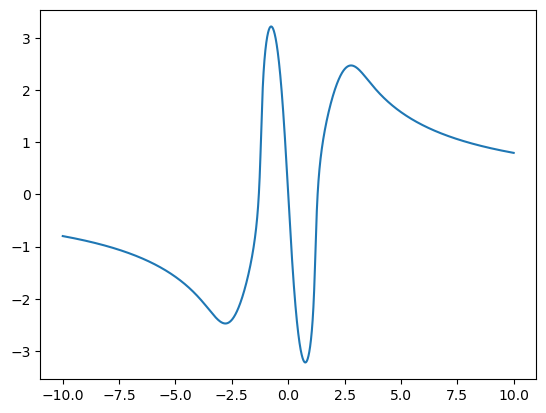

In [57]:
x=np.linspace(-10, 10,  11110)
plt.plot(x, y(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  x).imag)
plt.show()

In [58]:
def Gamma(a_0, b_1, b_3, b_5, z):

    #s=1j*integrate.fixed_quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -1000, 1000, n=20000)[0]
    #s=s-z.imag*integrate.fixed_quad(lambda x: y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -1000, 1000, n=20000)[0]

    #s=s+integrate.fixed_quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -1000, 1000, n=20000)[0]
    #s=s+1j*z.imag*integrate.fixed_quad(lambda x: y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -1000, 1000, n=20000)[0]

    s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s-z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]

    s=s+integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]

    #ТО ЧТО МОЖЕТ БЫТЬ ВЫЧИСЛЕНО АНАЛИТИЧЕСКИ

    #s=s+8j*integrate.quad(lambda x: (x**2-x*z.real-z.imag)/((x**2+1)*((x-z.real)**2+z.imag**2)), -np.inf, -1000)[0]
    #s=s+8j*integrate.quad(lambda x: (x**2-x*z.real-z.imag)/((x**2+1)*((x-z.real)**2+z.imag**2)),  1000, np.inf)[0]

    #s=s-8*integrate.quad(lambda x: (x-z.real+x*z.imag)/((x**2+1)*((x-z.real)**2+z.imag**2)), -np.inf, -1000)[0]
    #s=s-8*integrate.quad(lambda x: (x-z.real+x*z.imag)/((x**2+1)*((x-z.real)**2+z.imag**2)),  1000, np.inf)[0]
    
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)
#gamma(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  1+2j)

In [59]:
def F(a_0, b_1, b_3, b_5, z):
    lambda_inf=a_0-b_1-b_3/2-3*b_5/4
    return (lambda_z(a_0, b_1, b_3, b_5, z)*(z+1j)**4)/(lambda_inf*np.exp(gamma(a_0, b_1, b_3, b_5, z)))

In [60]:
def root(a_0, b_1, b_3, b_5, a, b):
    u=(F(a_0, b_1, b_3, b_5, a)*b**2-F(a_0, b_1, b_3, b_5, b)*a**2)/(b**2-a**2)+(a**2)*b**2
    v=(F(a_0, b_1, b_3, b_5, a)-F(a_0, b_1, b_3, b_5, b))/(b**2-a**2)+b**2+a**2
    z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
    z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)
    return z_1, z_2
root=np.vectorize(root)

In [61]:
z,z1=root(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1+1j, 3j)
print(z, z1)

(1.204858853845442+0.08721603591693014j) (1.1256588859897607-0.36016618561672537j)


In [62]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z)

array(-6.30828723e-13+1.24034116e-12j)

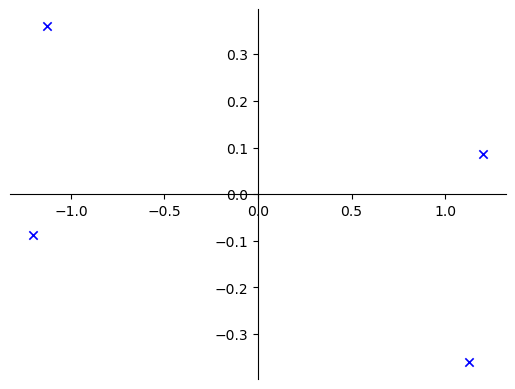

In [15]:
plt.scatter(z.real,z.imag,color='b',lw=1.2, marker="x")
plt.scatter(-z.real,-z.imag,color='b',lw=1.2, marker="x")
plt.scatter(z1.real,z1.imag,color='b',lw=1.2, marker="x")
plt.scatter(-z1.real,-z1.imag,color='b',lw=1.2, marker="x")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()


Поведение корней

C:\Users\tanya\AppData\Local\Temp\ipykernel_2880\956553487.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_2880\956553487.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontin

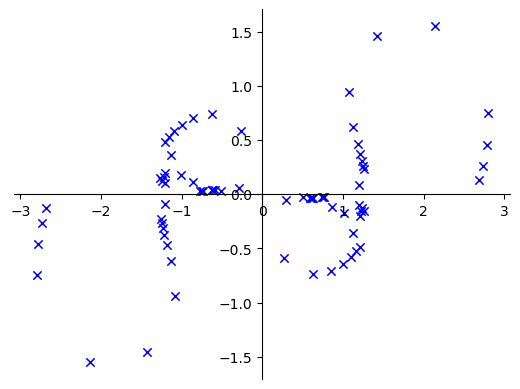

In [74]:
a=[-0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
for i in range(len(a)):
    z1,z2=root(-1, (-0.1-0.1j)/a[i], (-3+0.3j)/a[i], (2+0.2j)/a[i],  1+1j, -2+3j)
    plt.scatter(z1.real,z1.imag,color='b',lw=1.1, marker="x")
    plt.scatter(z2.real,z2.imag,color='b',lw=1.1, marker="x")
    plt.scatter(-z1.real,-z1.imag,color='b',lw=1.1, marker="x")
    plt.scatter(-z2.real,-z2.imag,color='b',lw=1.1, marker="x")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

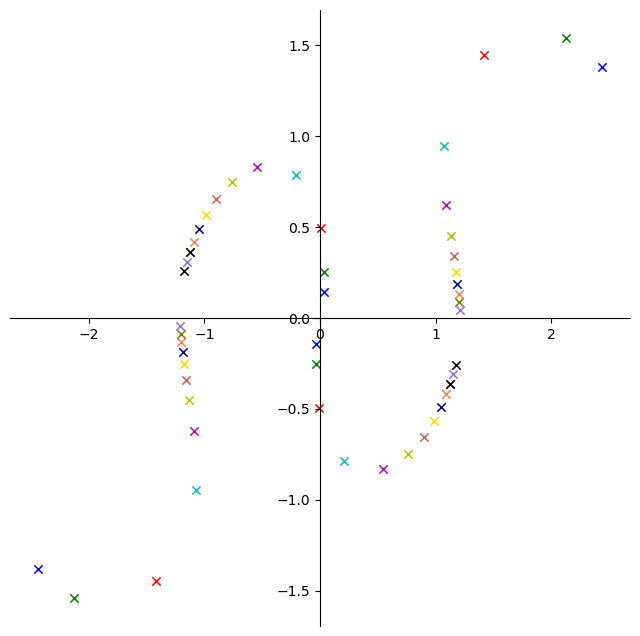

In [ ]:
plt.figure(figsize=(8,8)) 
palitra=['b', 'g', 'r', 'c', 'm', 'y', 'indianred',  'gold', 'navy', 'coral', 'olive', 'mediumpurple', 'k']
for i in range(len(a)): 
    plt.scatter(r[2*i].real,r[2*i].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(-r[2*i].real,-r[2*i].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(r[2*i+1].real,r[2*i+1].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(-r[2*i+1].real,-r[2*i+1].imag,color=palitra[i],lw=1.1, marker="x")


ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [ ]:
ai=[1-0.4j, 1-0.3j, 1-0.2j, 1-0.1j, 1, 1+0.1j, 1+0.2j, 1+0.3j, 1+0.4j, 1+0.5j, 1+0.6j, 1+0.7j] 
ri=np.array([1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 3+4j, 5+6j,1+2j, 5+6j,1+2j])
for i in range(len(ai)):
    z1,z2=root(-1, (-0.1-0.1j)/ai[i], (-3+0.3j)/ai[i], (2+0.2j)/ai[i],  1+1j, -2+3j)
    ri[2*i]=root_Newton(-1, (-0.1-0.1j)/ai[i], (-3+0.3j)/ai[i], (2+0.2j)/ai[i], z1)
    ri[2*i+1]=root_Newton(-1, (-0.1-0.1j)/ai[i], (-3+0.3j)/ai[i], (2+0.2j)/ai[i], z2)


In [ ]:
ri[-2]=root_Newton(-1, (-0.1-0.1j)/ai[-1], (-3+0.3j)/ai[-1], (2+0.2j)/ai[-1], 1.4+0.04j)
ri[-4]=root_Newton(-1, (-0.1-0.1j)/ai[-2], (-3+0.3j)/ai[-2], (2+0.2j)/ai[-2], 1.4+0.04j)

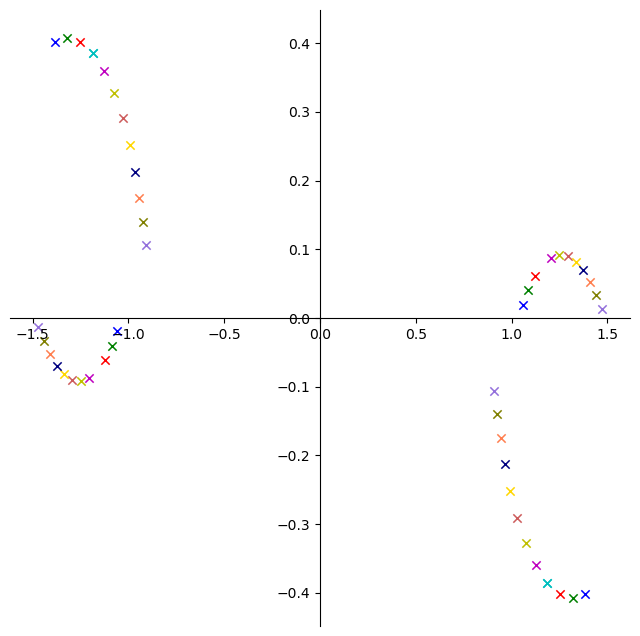

In [ ]:
plt.figure(figsize=(8,8)) 
palitra=['b', 'g', 'r', 'c', 'm', 'y', 'indianred',  'gold', 'navy', 'coral', 'olive', 'mediumpurple', 'k']
for i in range(len(ai)): 
    plt.scatter(ri[2*i].real,ri[2*i].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(-ri[2*i].real,-ri[2*i].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(ri[2*i+1].real,ri[2*i+1].imag,color=palitra[i],lw=1.1, marker="x")
    plt.scatter(-ri[2*i+1].real,-ri[2*i+1].imag,color=palitra[i],lw=1.1, marker="x")


ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [ ]:
lambda_z(-1, (-0.1-0.1j)/ai[-2], (-3+0.3j)/ai[-2], (2+0.2j)/ai[-2], ri[-4])

array(4.4408921e-16+4.4408921e-16j)

In [ ]:
def graph_root(x):
    z1,z2=root(-1, (-0.1-0.1j)/x, (-3+0.3j)/x, (2+0.2j)/x,  1+1j, -2+3j)
    z_1=root_Newton(-1, (-0.1-0.1j)/x, (-3+0.3j)/x, (2+0.2j)/x, z1)
    z_2=root_Newton(-1, (-0.1-0.1j)/x, (-3+0.3j)/x, (2+0.2j)/x, z2)
    return z_1, z_2
graph_root=np.vectorize(graph_root)

In [ ]:
x=np.linspace(0.05, 1.1, 25)
z_1, z_2=graph_root(x)

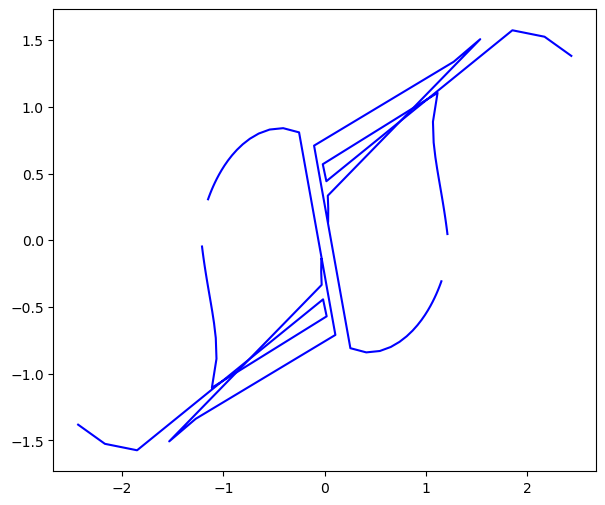

In [ ]:
plt.figure(figsize=(7,6)) 
plt.plot(z_1.real, z_1.imag, color='b')
plt.plot(-z_1.real, -z_1.imag, color='b')
plt.plot(z_2.real, z_2.imag, color='b')
plt.plot(-z_2.real, -z_2.imag, color='b')

In [23]:
a=np.linspace(0.2, 1.1, 100)
z1,z2=root(-1, (-0.1-0.1j)/a, (-3+0.3j)/a, (2+0.2j)/a,  1+1j, -2+3j)

C:\Users\tanya\AppData\Local\Temp\ipykernel_2880\956553487.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_2880\956553487.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontin

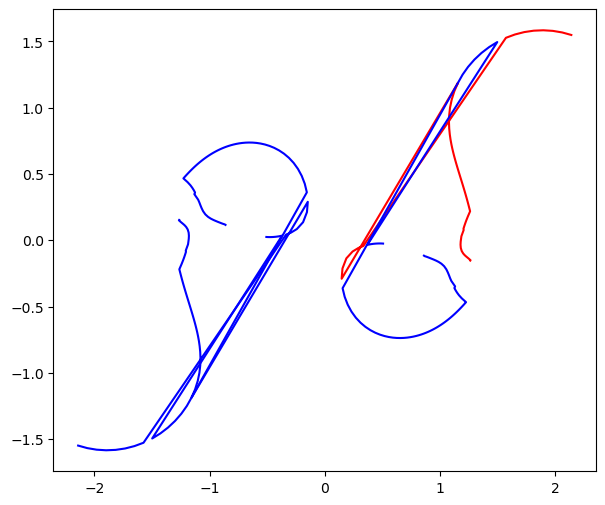

In [ ]:
plt.figure(figsize=(8,8)) 
plt.plot(z1.real, z1.imag, color='r')
plt.plot(-z1.real, -z1.imag, color='b')
plt.plot(z2.real, z2.imag, color='b')
plt.plot(-z2.real, -z2.imag, color='b')

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

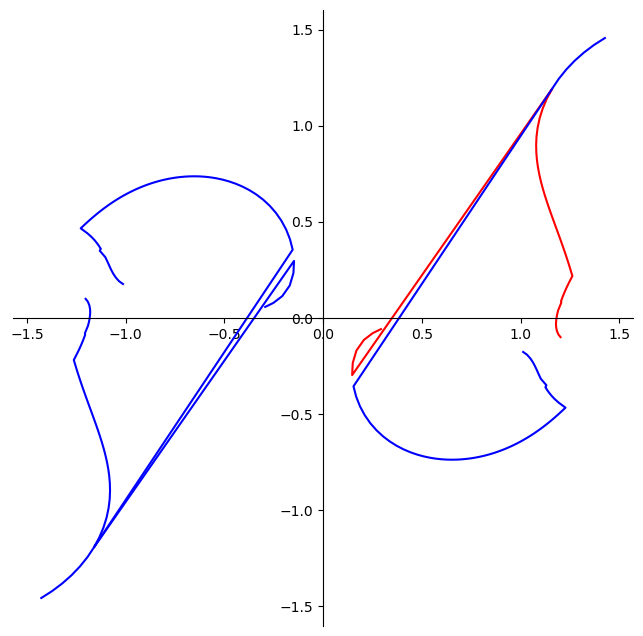

In [24]:
plt.figure(figsize=(8,8)) 
plt.plot(z1.real, z1.imag, color='r')
plt.plot(-z1.real, -z1.imag, color='b')
plt.plot(z2.real, z2.imag, color='b')
plt.plot(-z2.real, -z2.imag, color='b')

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [66]:
z1,z2=root(-1, (-0.1-0.1j)/0.3, (-3+0.3j)/0.3, (2+0.2j)/0.3,  1+1j, -2+3j)

C:\Users\tanya\AppData\Local\Temp\ipykernel_2880\956553487.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=s-z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


In [67]:
z1, z2

(array(1.08062827+0.94253032j), array(0.2699258-0.58373867j))

In [50]:
list_x=[]
list_y=[]
list_x1=[]
list_y1=[]
list_x2=[]
list_y2=[]
list_x3=[]
list_y3=[]
for i in range(len(z1)):
    if z1[i].real>0 and z1[i].imag>0:
        list_x.append(z1[i].real)
        list_y.append(z1[i].imag)
    if z1[i].real>0 and z1[i].imag<0:
        list_x1.append(z1[i].real)
        list_y1.append(z1[i].imag)
    if -z1[i].real<0 and -z1[i].imag>0:
        list_x2.append(z1[i].real)
        list_y2.append(z1[i].imag)
    if -z1[i].real<0 and -z1[i].imag<0:
        list_x3.append(z1[i].real)
        list_y3.append(z1[i].imag)


for i in range(len(z2)):
    if z2[i].real>0 and z2[i].imag<0:
        list_x1.append(z2[i].real)
        list_y1.append(z2[i].imag)
    if z2[i].real>0 and z2[i].imag>0:
        list_x.append(z2[i].real)
        list_y.append(z2[i].imag)
    if z2[i].real<0 and z2[i].imag>0:
        list_x2.append(z2[i].real)
        list_y2.append(z2[i].imag)
    if z2[i].real<0 and z2[i].imag<0:
        list_x3.append(z2[i].real)
        list_y3.append(z2[i].imag)

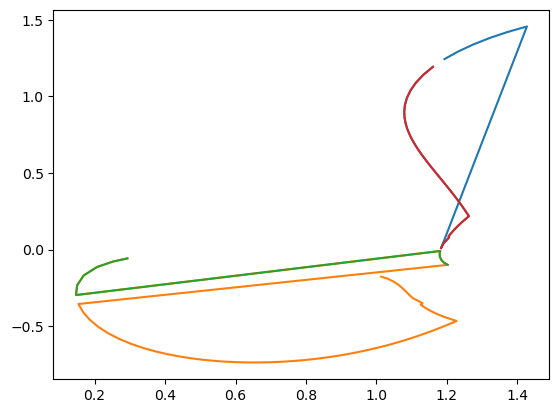

In [51]:
x=np.array(list_x)
y=np.array(list_y)
plt.plot(x,y)

x1=np.array(list_x1)
y1=np.array(list_y1)
plt.plot(x1,y1)

x2=np.array(list_x2)
y2=np.array(list_y2)
plt.plot(x2,y2)

x3=np.array(list_x3)
y3=np.array(list_y3)
plt.plot(x3,y3)

plt.show()